In [2]:
from sklearn.feature_extraction import image

from skimage import feature, exposure, io

from PIL import Image

import pandas as pd
import os

import cv2 as cv
import numpy as np

Image shape: (128, 128)
Patches shape: (16129, 2, 2)
[[134 135]
 [143 132]]


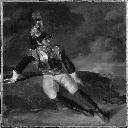

In [4]:
# Use the array data from the first image in this dataset:

filename = os.path.join('imagenes/train/realism/the-wounded-cuirassier.jpg')# Imagen de ejemplo
imagen = io.imread(filename)
img = Image.open(filename) #.convert('LA')

print('Image shape: {}'.format(imagen.shape))

patches = image.extract_patches_2d(imagen, (2, 2))
print('Patches shape: {}'.format(patches.shape))

# Here are just two of these patches:
print(patches[1]) 
img

In [3]:
#list(img.getdata())

In [106]:
#gray = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
surf = cv.xfeatures2d.SURF_create()

kp = sift.detect(imagen,None)
kp

[<KeyPoint 0x7feb4646f900>,
 <KeyPoint 0x7feb4646fa80>,
 <KeyPoint 0x7feb4646f870>,
 <KeyPoint 0x7feb4646fb10>,
 <KeyPoint 0x7feb4646fde0>,
 <KeyPoint 0x7feb4646fc00>,
 <KeyPoint 0x7feb4646f750>,
 <KeyPoint 0x7feb4646fe10>,
 <KeyPoint 0x7feb4646f7e0>,
 <KeyPoint 0x7feb4646fa20>,
 <KeyPoint 0x7feb4646f8d0>,
 <KeyPoint 0x7feb4646f990>,
 <KeyPoint 0x7feb4646ff60>,
 <KeyPoint 0x7feb4646ff30>,
 <KeyPoint 0x7feb4646f9c0>,
 <KeyPoint 0x7feb4646f930>,
 <KeyPoint 0x7feb4646f8a0>,
 <KeyPoint 0x7feb4646f810>,
 <KeyPoint 0x7feb4646fae0>,
 <KeyPoint 0x7feb4646ff90>,
 <KeyPoint 0x7feb4646ffc0>,
 <KeyPoint 0x7feb56799030>,
 <KeyPoint 0x7feb56799060>,
 <KeyPoint 0x7feb56799090>,
 <KeyPoint 0x7feb567990c0>,
 <KeyPoint 0x7feb567990f0>,
 <KeyPoint 0x7feb56799120>,
 <KeyPoint 0x7feb56799150>,
 <KeyPoint 0x7feb56799180>,
 <KeyPoint 0x7feb567991b0>,
 <KeyPoint 0x7feb567991e0>,
 <KeyPoint 0x7feb56799210>,
 <KeyPoint 0x7feb56799240>,
 <KeyPoint 0x7feb56799270>,
 <KeyPoint 0x7feb567992a0>,
 <KeyPoint 0x7feb567

In [16]:
image2 = cv.imread(filename)
#resize image -scale
scale = 1.0
w = int(image2.shape[1] / scale)

#image = imutils.resize(image, width=min(400, image.shape[1]))
w

536

In [12]:
hog = cv.HOGDescriptor()
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())

(rects, weights) = hog.detectMultiScale(image2, winStride=(4, 4), padding=(8, 8), scale=1.05)

In [53]:
h = feature.hog(image2, 
                orientations=9,
                pixels_per_cell=(8, 8), 
                cells_per_block=(3, 3), 
                visualise=False)
h

array([0.00913529, 0.01878273, 0.01222524, ..., 0.01321658, 0.02512187,
       0.04418701])

In [47]:
img_array = np.array(img.getdata(), dtype = np.uint8)

result = feature.greycomatrix(img_array, [1], [0, np.pi/2])
result[:, :, 0, 0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [ ]:
print(cv2.__version__)

In [ ]:
(H, hogImage) = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
cv.imshow("HOG Image", hogImage)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
hogImage

In [54]:
img.histogram() 

[0,
 0,
 5,
 11,
 37,
 65,
 79,
 132,
 191,
 272,
 349,
 512,
 620,
 832,
 956,
 1086,
 1301,
 1386,
 1529,
 1643,
 1763,
 1801,
 1902,
 2073,
 2328,
 2501,
 2662,
 3124,
 3340,
 3543,
 3724,
 3952,
 4241,
 4369,
 4705,
 4770,
 4778,
 4958,
 4975,
 5090,
 5051,
 4959,
 4933,
 4819,
 4786,
 4721,
 4657,
 4683,
 4634,
 4759,
 4475,
 4608,
 4639,
 4723,
 4742,
 4924,
 4912,
 4903,
 4998,
 4975,
 4932,
 4776,
 4624,
 4424,
 4413,
 4079,
 3933,
 3701,
 3403,
 3271,
 3126,
 2892,
 2724,
 2624,
 2493,
 2438,
 2257,
 2314,
 2287,
 2240,
 2201,
 2120,
 2076,
 2108,
 2058,
 2179,
 2164,
 2111,
 2041,
 2031,
 2059,
 1940,
 1904,
 1807,
 1845,
 1783,
 1796,
 1852,
 1768,
 1735,
 1737,
 1629,
 1567,
 1565,
 1634,
 1537,
 1498,
 1394,
 1386,
 1363,
 1294,
 1220,
 1206,
 1172,
 1162,
 1042,
 1063,
 999,
 910,
 816,
 844,
 770,
 734,
 680,
 686,
 630,
 674,
 626,
 662,
 704,
 679,
 601,
 625,
 619,
 648,
 600,
 602,
 620,
 556,
 533,
 453,
 491,
 494,
 476,
 465,
 476,
 413,
 480,
 487,
 436,
 449,
 4

In [63]:
from matplotlib import pyplot as plt


In [99]:
# Para procesar todos los archivos de una carpeta
import glob
estilos = ['realism', 'surrealism', 'abstract-art', 'pop-art']
for e in estilos:
    carpeta = 'imagenes/test/{}/'.format(e)
    for image_file in glob.iglob(carpeta + '*.jpg'):
        nombre = image_file.split('/')[-1]
        print(image_file)
        image_a = Image.open(image_file).convert('L')
        img_resized = image_a.resize((128,128))
        img_resized.save(carpeta + nombre,'jpeg')

imagenes/test/realism/the-dresser-in-gruchy-1854.jpg
imagenes/test/realism/sluice-in-the-optevoz-valley-1854.jpg
imagenes/test/realism/hillside-with-rocky-outcrops-1852.jpg
imagenes/test/realism/woman-baking-bread-1854.jpg
imagenes/test/realism/landscape-with-figures-by-a-river.jpg
imagenes/test/realism/portrait-of-e-a-selivanovskaya-1852.jpg
imagenes/test/realism/at-elshout-sun-1854.jpg
imagenes/test/realism/dawn-in-the-desert-1852.jpg
imagenes/test/realism/sea-shore-in-the-vicinity-oranienbaum-1854.jpg
imagenes/test/realism/the-storm-1853.jpg
imagenes/test/realism/charles-meryon-coat-of-arms-symbolizing-the-city-of-paris-1854.jpg
imagenes/test/realism/old-pine-1854.jpg
imagenes/test/realism/portrait-of-olga-ivanovna-demonkala-1851.jpg
imagenes/test/realism/véron.jpg
imagenes/test/realism/portrait-of-nikolay-o-ge-artist-s-father.jpg
imagenes/test/realism/charles-meryon-001.jpg
imagenes/test/realism/type-of-kiev-from-the-dnieper-to-the-pechersk-lavra-1852.jpg
imagenes/test/realism/char

imagenes/test/surrealism/retrato-de-roma-1933.jpg
imagenes/test/surrealism/dux-et-comes-iv-1932(1).jpg
imagenes/test/surrealism/woman-on-the-beach-1932.jpg
imagenes/test/surrealism/au-cirque-medrano-1932.jpg
imagenes/test/surrealism/k-k-1933.jpg
imagenes/test/surrealism/necrophiliac-fountain-flowing-from-a-grand-piano-1933.jpg
imagenes/test/surrealism/the-strange-case-of-monsieur-k-1933.jpg
imagenes/test/surrealism/my-dress-hangs-there-1933.jpg
imagenes/test/surrealism/the-triangular-hour-1933.jpg
imagenes/test/surrealism/the-phantom-cart-1933.jpg
imagenes/test/surrealism/notre-dame-de-paris-1933.jpg
imagenes/test/surrealism/fa-ades-rue-de-l-h-tel-de-ville-1932.jpg
imagenes/test/surrealism/the-phenomenon-of-ecstasy.jpg
imagenes/test/surrealism/untitled-1932.jpg
imagenes/test/surrealism/la-casa-fantasmal-1932(1).jpg
imagenes/test/surrealism/barcelona-1932.jpg
imagenes/test/surrealism/space-tunnel-1932.jpg
imagenes/test/surrealism/portrait-de-gala-1932.jpg
imagenes/test/surrealism/compos

imagenes/test/abstract-art/street-in-helgoland-ii.jpg
imagenes/test/abstract-art/untitled-1946(2).jpg
imagenes/test/abstract-art/fallen-figure-1939.jpg
imagenes/test/abstract-art/composition-1944.jpg
imagenes/test/abstract-art/untitled-1.jpg
imagenes/test/abstract-art/suzanne.jpg
imagenes/test/abstract-art/study-in-green-and-black-1939.jpg
imagenes/test/abstract-art/glass-facade-1940(1).jpg
imagenes/test/abstract-art/desert-1940.jpg
imagenes/test/abstract-art/three-figures.jpg
imagenes/test/abstract-art/complex-simple-1939.jpg
imagenes/test/abstract-art/colored-ideogram-1939.jpg
imagenes/test/abstract-art/seine-cart-1939.jpg
imagenes/test/abstract-art/woodburning.jpg
imagenes/test/abstract-art/tempered-elan-1944.jpg
imagenes/test/abstract-art/a-floating-figure-1942.jpg
imagenes/test/abstract-art/gr-n-rot-1939.jpg
imagenes/test/abstract-art/ph-351-1940.jpg
imagenes/test/abstract-art/white-figure-1943.jpg
imagenes/test/abstract-art/constructive-composition-1943.jpg
imagenes/test/abstract

In [81]:
filename = os.path.join('imagenes/train/realism/the-wounded-cuirassier.jpg')# Imagen de ejemplo
imagen1 = io.imread(filename)
imagen1.shape

(650, 536, 3)

In [91]:
image_a = Image.open(filename).convert('L')
img_resized = image_a.resize((128,128))
img_resized
img_resized.save('gg','jpeg')

(536, 650)
(128, 128)


In [100]:
df = pd.read_csv('data/datos-raw-train.csv')

In [101]:
df

,albums,artistName,artistUrl,estilo,flags,height,id,image,images,map,paintingUrl,title,width,year
0,NaN,Jean-Baptiste-Simeon Chardin,/en/jean-baptiste-simeon-chardin,realism,2,2554,58faae5bedc2c9659c66eaca,https://uploads3.wikiart.org/00129/images/jean...,NaN,01234567*,/en/jean-baptiste-simeon-chardin/woman-cleanin...,Woman Cleaning Turnips,2024,1740
1,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,650,57726f11edc2cb3880b94e09,https://uploads2.wikiart.org/images/theodore-g...,NaN,0123**67*,/en/theodore-gericault/the-wounded-cuirassier,The Wounded Cuirassier,536,1814
2,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,295,57726f12edc2cb3880b94e99,https://uploads1.wikiart.org/images/theodore-g...,NaN,0*23**67*,/en/theodore-gericault/the-three-skulls-1814,The&#160;three skulls,560,1812-1814
3,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,650,57726f12edc2cb3880b94f09,https://uploads7.wikiart.org/images/theodore-g...,"[{'width': 1528, 'height': 1940, 'image': 'htt...",0123**67*,/en/theodore-gericault/wounded-cuirassier,Wounded Cuirassier,532,1814
4,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,768,57726f11edc2cb3880b94df9,https://uploads7.wikiart.org/images/theodore-g...,"[{'width': 555, 'height': 680, 'image': 'https...",0123**67*,/en/theodore-gericault/the-wounded-cuirassier-...,The Wounded Cuirassier,641,1814
5,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,650,57726f11edc2cb3880b94d36,https://uploads3.wikiart.org/images/theodore-g...,NaN,0123**67*,/en/theodore-gericault/the-head-of-white-horse,The head of&#160;white horse,548,1815
6,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,640,57726f0eedc2cb3880b9489a,https://uploads4.wikiart.org/images/theodore-g...,NaN,0123**67*,/en/theodore-gericault/boxers-1818-1,Boxers,769,1818
7,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,445,57726f12edc2cb3880b94e69,https://uploads1.wikiart.org/images/theodore-g...,NaN,0*23**67*,/en/theodore-gericault/the-murderers-carry-the...,The&#160;murderers carry the&#160;body of Fualdes,600,1818
8,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,505,57726f0eedc2cb3880b9486a,https://uploads6.wikiart.org/images/theodore-g...,NaN,0*23**67*,/en/theodore-gericault/anatomical-pieces-1819-1,Anatomical Pieces,600,1819
9,NaN,Th&#233;odore G&#233;ricault,/en/theodore-gericault,realism,2,600,57726f0eedc2cb3880b9492a,https://uploads1.wikiart.org/images/theodore-g...,NaN,0123**67*,/en/theodore-gericault/head-of-a-drowned-man-1...,Head of a Drowned Man,497,1819
